# Predicting raise in crime in Chicago

data analysis and visualization for crime in Chicago from 2001 to 2016.

 **I will answer few questions** such as  How has crime in Chicago changed across years? and Are some types of crimes more likely to happen in specific locations or specific time of the day or
 specific day of the week than other types of crimes?

### Tools

- Docker
- Yarn
- Machine learning 
- Hadoop
- Spark

**First we Initializing Pyspark** and import our dataSet

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local") \
    .appName('try1') \
    .getOrCreate()

In [2]:
df = spark.read.csv('/*.csv', header=True, inferSchema=True)
df.count()

7941286

now, we will print the first 5 rows to explore the data well.

In [3]:
df.limit(5).toPandas()

,_c0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073157,-87.706818608,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782921527,-87.60436317,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908283,-87.758371958,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885686845,-87.749515983,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297242,-87.761750709,"(41.886297242, -87.761750709)"


**Now, we will delete the unwanted columns.**

In [4]:
columns_to_drop = ['_c0', 'Case Number', 'IUCR','Updated On', 'FBI Code', 'Beat','Ward','Community Area', 'Location','ID','Date','Block']
df = df.drop(*columns_to_drop)

In [5]:
df.limit(5).toPandas()

,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1154907.0,1893681.0,2016,41.864073157,-87.706818608
1,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,1183066.0,1864330.0,2016,41.782921527,-87.60436317
2,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,1140789.0,1904819.0,2016,41.894908283,-87.758371958
3,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,1143223.0,1901475.0,2016,41.885686845,-87.749515983
4,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,1139890.0,1901675.0,2016,41.886297242,-87.761750709


In the cell below, we convert the spark dataframe to pandas dataframe and print its transpose using pandas to read the data well

In [6]:
df.limit(5).toPandas().T

,0,1,2,3,4
Primary Type,BATTERY,BATTERY,PUBLIC PEACE VIOLATION,BATTERY,THEFT
Description,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,RECKLESS CONDUCT,SIMPLE,$500 AND UNDER
Location Description,APARTMENT,RESIDENCE,STREET,SIDEWALK,RESIDENCE
Arrest,True,False,False,False,False
Domestic,True,True,False,False,True
District,10.0,3.0,15.0,15.0,15.0
X Coordinate,1154907.0,1183066.0,1140789.0,1143223.0,1139890.0
Y Coordinate,1893681.0,1864330.0,1904819.0,1901475.0,1901675.0
Year,2016,2016,2016,2016,2016
Latitude,41.864073157,41.782921527,41.894908283,41.885686845,41.886297242


Having a look at the null values in our dataset..



In [7]:
def checkNull(df):
    count = {}
    for col in df.columns:
        count[col] = df.filter(df[col].isNull()).count()
    return count

null_count = checkNull(df)
null_count

{'Primary Type': 0,
 'Description': 0,
 'Location Description': 1990,
 'Arrest': 0,
 'Domestic': 0,
 'District': 91,
 'X Coordinate': 105573,
 'Y Coordinate': 105573,
 'Year': 0,
 'Latitude': 105573,
 'Longitude': 105574}

change date from string type to date type

In [60]:
df = df.withColumn("test1",F.to_date(F.col("value"),"yyyy-MM-dd")).\
        withColumn("test2",F.to_date(F.col("value"),"dd-MM-yyyy"))

NameError: name 'date_format' is not defined

At this point, I think we are ready to explore..


### Exploration and Visualization

At this point, I think we are done with all the preprocessing and cleaning. Now it is time to see what we got. In this section, I will make a relationship between coiumns to discover the data set well



In [8]:
df.select("Primary Type").distinct().count()

36

In [9]:
df.select("Primary Type").distinct().show()

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|                IUCR|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
+--------------------+
only showing top 20 rows



how many crimes are in dataset

In [10]:
df.select("Primary Type").count()

7941286

Now, we plot crimes primary types.

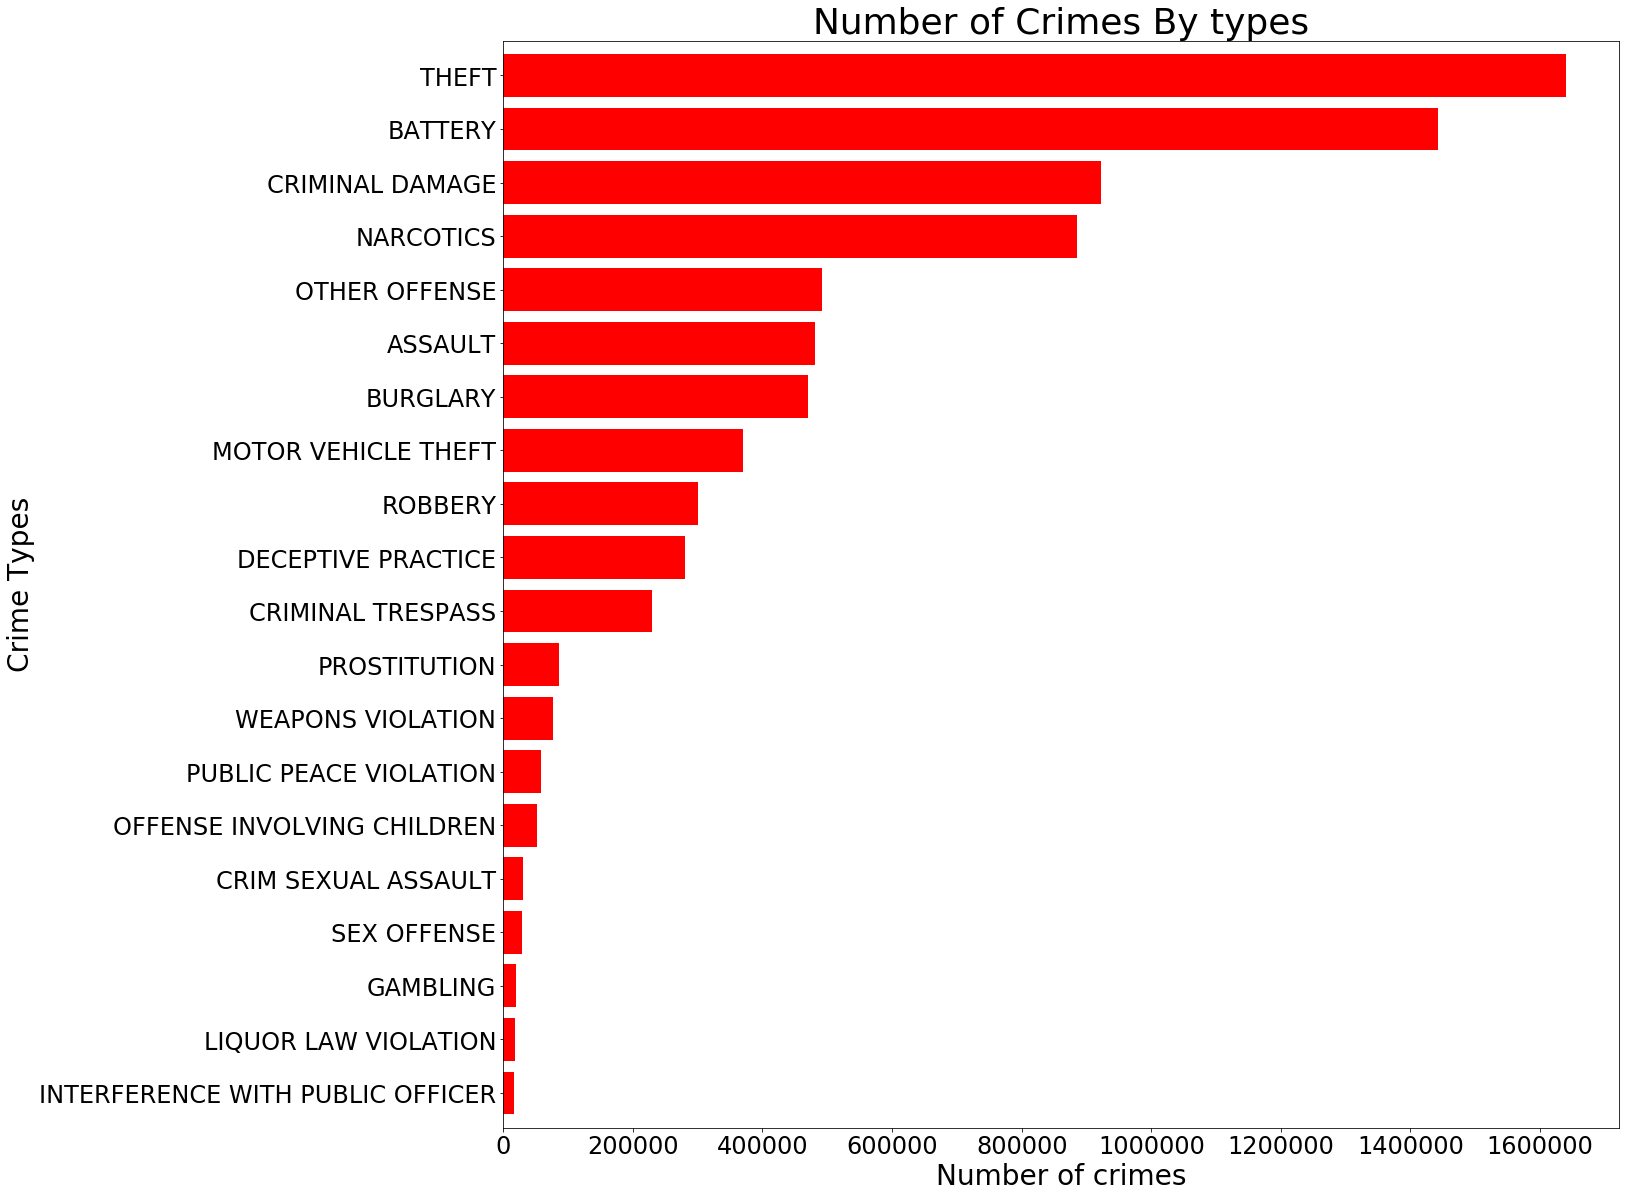

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
crime_type  = df.groupBy("Primary Type").count().collect()
typ = [item[0] for item in crime_type]
count = [item[1] for item in crime_type]
crime_type = {"type" : typ, "count": count}
crime_type = pd.DataFrame(crime_type)
crime_type = crime_type.sort_values(by = "count", ascending  = False)
crime_type = crime_type.iloc[:20]
myplot = crime_type .plot(figsize = (20,20), kind = "barh", color = "red", width = 0.8,
                               x = "type", y = "count", legend = False)
myplot.invert_yaxis()
plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Types", fontsize = 28)
plt.title("Number of Crimes By types", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

as shown by graph below, THEFT is the biggest type

Now, lets discover the number of crimes per year

In [14]:
df.groupBy("Year").count().show()

+------------+------+
|        Year| count|
+------------+------+
|        2016|265462|
|        2012|335670|
|Y Coordinate|     1|
|        2017| 11357|
|        2014|274527|
|        2013|306703|
|        2005|455811|
|        2002|490879|
|        2009|783900|
|        2006|794685|
|        2004|388205|
|        2011|352066|
|        2008|852053|
|        2007|621849|
|41.789832136|     1|
|        2015|262995|
|        2001|568517|
|        2010|700692|
|        2003|475913|
+------------+------+



we could graph number of crime per year from 2001 to 2004

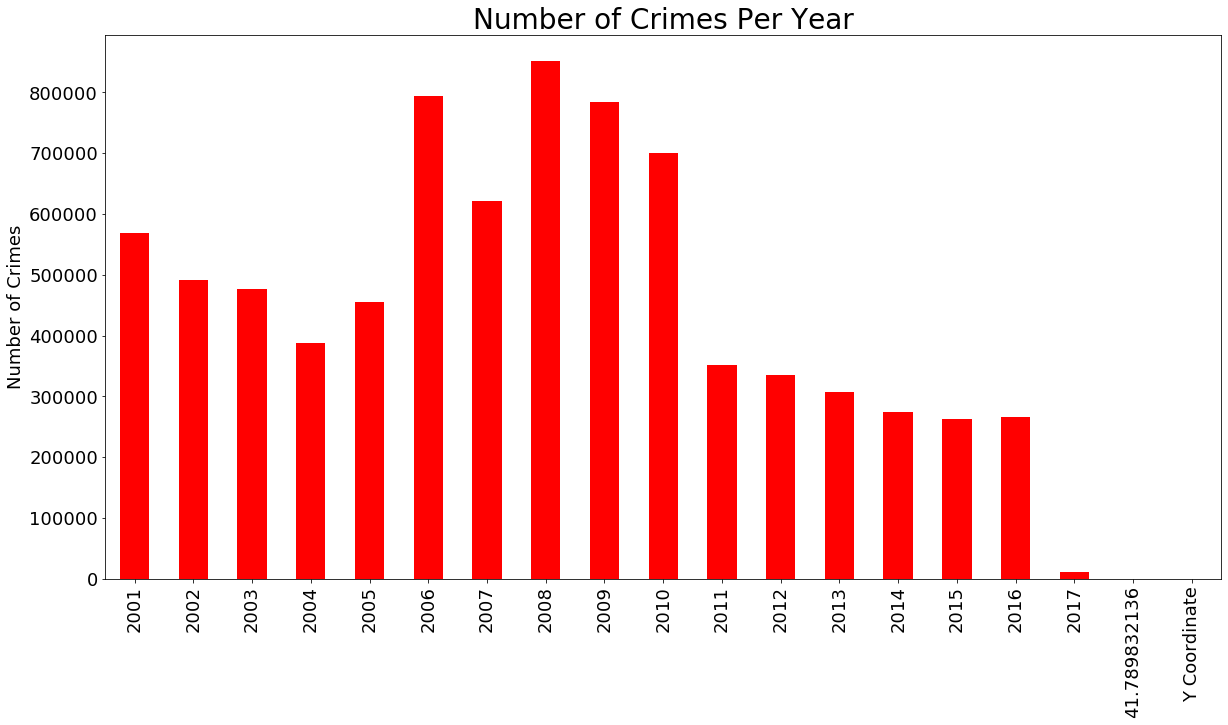

In [13]:
numberOfCrime = df.groupBy("Year").count().collect()
year = [item[0] for item in numberOfCrime]
count = [item[1] for item in numberOfCrime]
numberOfCrime = {"year":year,"count":count}
numberOfCrime = pd.DataFrame(numberOfCrime)
numberOfCrime = numberOfCrime.sort_values(by = "year")
numberOfCrime.plot(figsize = (20,10), kind = "bar", color = "red",
                               x = "year", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

plot to discover the data well

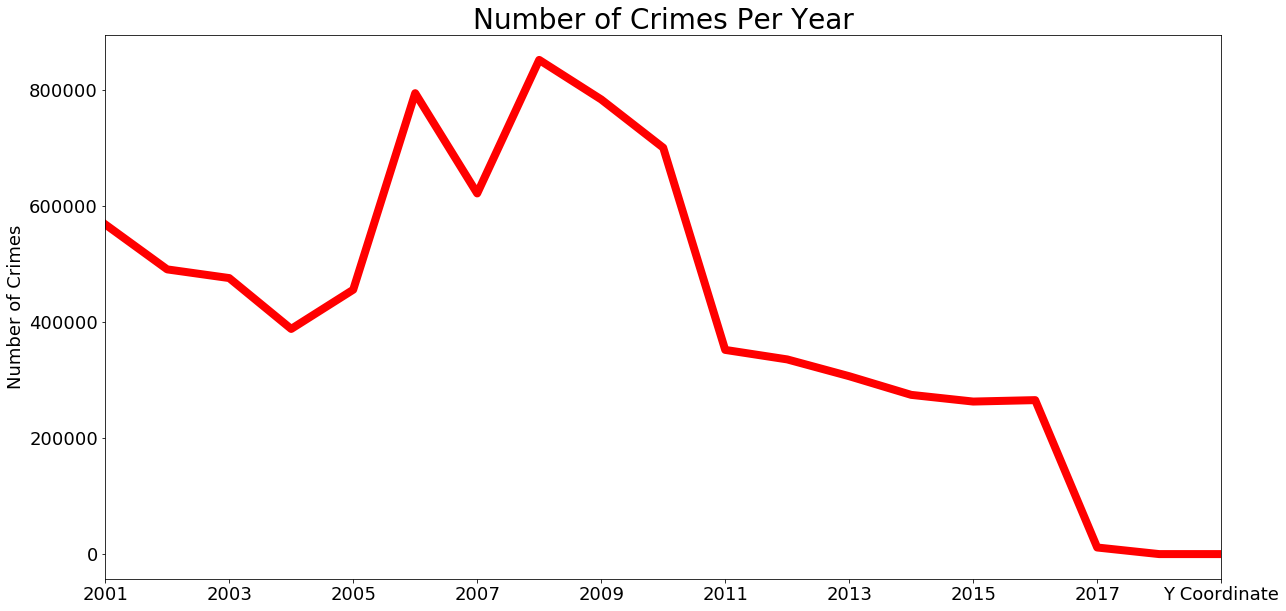

In [15]:
numberOfCrime = df.groupBy("Year").count().collect()
year = [item[0] for item in numberOfCrime]
count = [item[1] for item in numberOfCrime]
numberOfCrime = {"year":year,"count":count}
numberOfCrime = pd.DataFrame(numberOfCrime)
numberOfCrime = numberOfCrime.sort_values(by = "year")
numberOfCrime.plot(figsize = (20,10), kind = "line", x = "year", y = "count", 
                      color = "red", linewidth = 8, legend = False)
plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

lets discover where the crimes take place

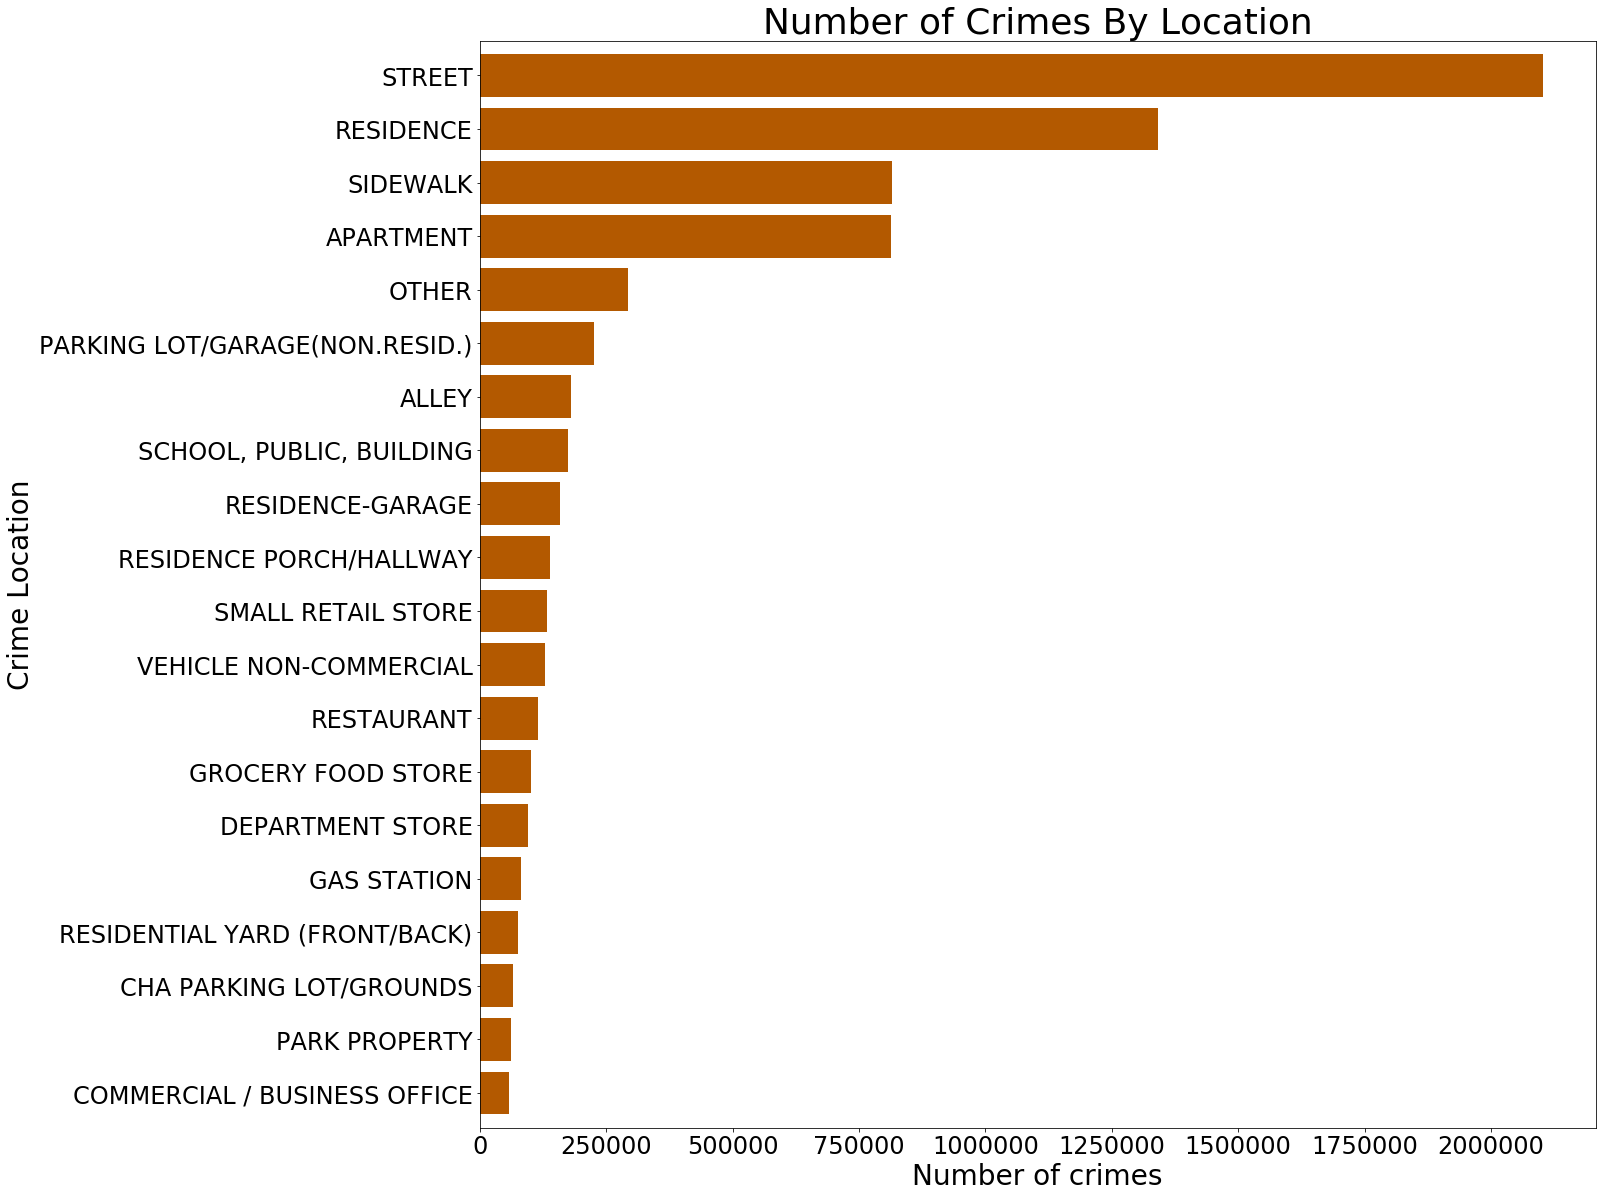

In [16]:
crimeLocation = df.groupBy("Location Description").count().collect()
location = [item[0] for item in crimeLocation]
count = [item[1] for item in crimeLocation]
crimeLocation = {"location":location,"count":count}
crimeLocation = pd.DataFrame(crimeLocation)
crimeLocation = crimeLocation.sort_values(by = "count", ascending  = False)
crimeLocation = crimeLocation.iloc[:20]
myplot = crimeLocation .plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "location", y = "count", legend = False)
myplot.invert_yaxis()
plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Location", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()


In [17]:
cols = ['Domestic','Arrest']
df.select(cols).limit(12).toPandas().T

,0,1,2,3,4,5,6,7,8,9,10,11
Domestic,True,True,False,False,True,False,False,False,False,True,False,True
Arrest,True,False,False,False,False,False,False,False,False,False,True,True


In [18]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

@udf("int")
def cat_to_int(x): 
    return 1 if (x == 'True') else 0

# alternatively way of definning the udf
#cat_to_int_udf = udf(lambda x: cat1_to_int(x), IntegerType())

_df = df 
for col in cols:
    _df =  _df.withColumn(col, cat_to_int(col))
    print(col)
    

df = _df
_df.select(cols).limit(15).toPandas()


Domestic
Arrest


,Domestic,Arrest
0,1,1
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


In [19]:
cols = ['District', 'X Coordinate', 'Y Coordinate','Latitude','Longitude']
df.select(cols).limit(5).toPandas().T

,0,1,2,3,4
District,10.0,3.0,15.0,15.0,15.0
X Coordinate,1154907.0,1183066.0,1140789.0,1143223.0,1139890.0
Y Coordinate,1893681.0,1864330.0,1904819.0,1901475.0,1901675.0
Latitude,41.864073157,41.782921527,41.894908283,41.885686845,41.886297242
Longitude,-87.706818608,-87.60436317,-87.758371958,-87.749515983,-87.761750709


In [21]:
import pyspark.sql.functions as f

_df = df 
for col in cols:
    mean, sttdev = _df.select(f.mean(col), f.stddev(col)).first()
    _df = _df \
        .withColumn(col, (f.col(col).cast("int"))) \
        .dropna() \
        .withColumn(col, (f.col(col) - mean) / sttdev)

df = _df
df.select(cols).limit(5).toPandas().T

,0,1,2,3,4
District,-1.326267e-04,-1.000217e+00,-1.326267e-04,-1.326267e-04,-1.326267e-04
X Coordinate,1.928131e-07,1.000000e+00,-9.999999e-01,-9.999999e-01,-9.999999e-01
Y Coordinate,-1.258620e-07,-1.258620e-07,-1.258620e-07,-1.258620e-07,-1.258620e-07
Latitude,-6.384677e-03,-6.384677e-03,-6.384677e-03,-6.384677e-03,-6.384677e-03
Longitude,-1.723021e+00,-1.723021e+00,-1.723021e+00,-1.723021e+00,-1.723021e+00


In [22]:
df = df.cache() # cache dataframe in its latest state in memory
cols = ['Year','Location Description','Primary Type','Description']
df.select(cols).limit(5).toPandas().T

,0,1,2,3,4
Year,2016,2016,2016,2016,2016
Location Description,APARTMENT,RESIDENCE,STREET,SIDEWALK,RESIDENCE
Primary Type,BATTERY,BATTERY,PUBLIC PEACE VIOLATION,BATTERY,THEFT
Description,DOMESTIC BATTERY SIMPLE,DOMESTIC BATTERY SIMPLE,RECKLESS CONDUCT,SIMPLE,$500 AND UNDER


In [23]:

_df = df
for col in cols: 
    vals = _df.select(col).distinct().collect()
    vals = list(map(lambda x: '{}_{}'.format(col, x[col]), vals))
    for val in vals: 
        _df = _df.withColumn(val, f.udf(lambda x: 1 if x==val.split('_')[1] else 0, IntegerType())(col))
    
    _df = _df.drop(col)
    #_df.select(vals).show(5)

df = _df
_df.limit(5).toPandas().T

,0,1,2,3,4
Arrest,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Domestic,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
District,-1.326267e-04,-1.000217e+00,-1.326267e-04,-1.326267e-04,-1.326267e-04
X Coordinate,1.928131e-07,1.000000e+00,-9.999999e-01,-9.999999e-01,-9.999999e-01
Y Coordinate,-1.258620e-07,-1.258620e-07,-1.258620e-07,-1.258620e-07,-1.258620e-07
...,...,...,...,...,...
"Description_CYCLE, SCOOTER, BIKE NO VIN",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Description_HARBOR RUNAWAY,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Description_POSS: CANNABIS 30GMS OR LESS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Description_POSS: BARBITUATES,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


,0,1,2,3,4
District,10.0,3.0,15.0,15.0,15.0
X Coordinate,1154907.0,1183066.0,1140789.0,1143223.0,1139890.0
Y Coordinate,1893681.0,1864330.0,1904819.0,1901475.0,1901675.0
Latitude,41.864073157,41.782921527,41.894908283,41.885686845,41.886297242
Longitude,-87.706818608,-87.60436317,-87.758371958,-87.749515983,-87.761750709


calcluate the z-score

AnalysisException: 'Cannot resolve column name "Year_41.789832136" among (Arrest, Domestic, District, X Coordinate, Y Coordinate, Latitude, Longitude, Year_2016, Year_2012, Year_Y Coordinate, Year_2017, Year_2014, Year_2013, Year_2005, Year_2002, Year_2009, Year_2006, Year_2004, Year_2011, Year_2008, Year_2007, Year_41.789832136, Year_2015, Year_2001, Year_2010, Year_2003, Location Description_RAILROAD PROPERTY, Location Description_AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA, Location Description_EXPRESSWAY EMBANKMENT, Location Description_POLICE FACILITY/VEH PARKING LOT, Location Description_MOTEL, Location Description_SIDEWALK, Location Description_AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA, Location Description_PUBLIC GRAMMAR SCHOOL, Location Description_CTA GARAGE / OTHER PROPERTY, Location Description_CAR WASH, Location Description_TRUCKING TERMINAL, Location Description_AIRPORT/AIRCRAFT, Location Description_HOSPITAL, Location Description_MEDICAL/DENTAL OFFICE, Location Description_FEDERAL BUILDING, Location Description_TRAILER, Location Description_SCHOOL, PUBLIC, GROUNDS, Location Description_CTA STATION, Location Description_SPORTS ARENA/STADIUM, Location Description_HOUSE, Location Description_CEMETARY, Location Description_ROOMING HOUSE, Location Description_VACANT LOT, Location Description_SCHOOL, PRIVATE, BUILDING, Location Description_DRIVEWAY, Location Description_VEHICLE-COMMERCIAL, Location Description_COUNTY JAIL, Location Description_WAREHOUSE, Location Description_APPLIANCE STORE, Location Description_AIRPORT TERMINAL UPPER LEVEL - SECURE AREA, Location Description_VEHICLE - OTHER RIDE SERVICE, Location Description_AIRPORT EXTERIOR - NON-SECURE AREA, Location Description_DUMPSTER, Location Description_COIN OPERATED MACHINE, Location Description_CTA PLATFORM, Location Description_BARBER SHOP/BEAUTY SALON, Location Description_None, Location Description_CLUB, Location Description_GANGWAY, Location Description_BANK, Location Description_FACTORY/MANUFACTURING BUILDING, Location Description_GROCERY FOOD STORE, Location Description_BRIDGE, Location Description_CHA GROUNDS, Location Description_RESIDENCE-GARAGE, Location Description_CHA STAIRWELL, Location Description_CONVENIENCE STORE, Location Description_LAKEFRONT/WATERFRONT/RIVERBANK, Location Description_PUBLIC HIGH SCHOOL, Location Description_ATM (AUTOMATIC TELLER MACHINE), Location Description_BASEMENT, Location Description_AUTO, Location Description_ELEVATOR, Location Description_AIRCRAFT, Location Description_JUNK YARD/GARBAGE DUMP, Location Description_HOTEL, Location Description_CHA HALLWAY/STAIRWELL/ELEVATOR, Location Description_TAXI CAB, Location Description_STREET, Location Description_DRIVEWAY - RESIDENTIAL, Location Description_LAKE, Location Description_CHURCH, Location Description_RIVER, Location Description_BARBERSHOP, Location Description_SCHOOL YARD, Location Description_ATHLETIC CLUB, Location Description_GARAGE/AUTO REPAIR, Location Description_OTHER COMMERCIAL TRANSPORTATION, Location Description_TRUCK, Location Description_CHA ELEVATOR, Location Description_COMMERCIAL / BUSINESS OFFICE, Location Description_LIBRARY, Location Description_LIVERY AUTO, Location Description_RIVER BANK, Location Description_CTA BUS, Location Description_CTA BUS STOP, Location Description_LAUNDRY ROOM, Location Description_SCHOOL, PUBLIC, BUILDING, Location Description_GAS STATION DRIVE/PROP., Location Description_CREDIT UNION, Location Description_BANQUET HALL, Location Description_GOVERNMENT BUILDING, Location Description_NURSING HOME, Location Description_GAS STATION, Location Description_CHA HALLWAY, Location Description_"CTA ""L"" TRAIN", Location Description_"CTA ""L"" PLATFORM", Location Description_VEHICLE NON-COMMERCIAL, Location Description_SMALL RETAIL STORE, Location Description_CHA APARTMENT, Location Description_ABANDONED BUILDING, Location Description_TAVERN/LIQUOR STORE, Location Description_CLEANERS/LAUNDROMAT, Location Description_YARD, Location Description_CHA LOBBY, Location Description_RESIDENCE, Location Description_CHA PLAY LOT, Location Description_PAWN SHOP, Location Description_BOAT/WATERCRAFT, Location Description_POOLROOM, Location Description_POOL ROOM, Location Description_OFFICE, Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA, Location Description_STAIRWELL, Location Description_SCHOOL, PRIVATE, GROUNDS, Location Description_AIRPORT VENDING ESTABLISHMENT, Location Description_DRUG STORE, Location Description_DEPARTMENT STORE, Location Description_VACANT LOT/LAND, Location Description_HOSPITAL BUILDING/GROUNDS, Location Description_Description, Location Description_FACTORY, Location Description_CURRENCY EXCHANGE, Location Description_CHURCH PROPERTY, Location Description_CHA BREEZEWAY, Location Description_ALLEY, Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA, Location Description_PARKING LOT, Location Description_PARK PROPERTY, Location Description_RESIDENCE PORCH/HALLWAY, Location Description_CLEANING STORE, Location Description_AIRPORT TRANSPORTATION SYSTEM (ATS), Location Description_RESTAURANT, Location Description_RESIDENTIAL YARD (FRONT/BACK), Location Description_FOREST PRESERVE, Location Description_NEWSSTAND, Location Description_APARTMENT, Location Description_OTHER, Location Description_DAY CARE CENTER, Location Description_RETAIL STORE, Location Description_TAVERN, Location Description_LAGOON, Location Description_CTA TRAIN, Location Description_AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA, Location Description_HALLWAY, Location Description_HOTEL/MOTEL, Location Description_PORCH, Location Description_ANIMAL HOSPITAL, Location Description_GOVERNMENT BUILDING/PROPERTY, Location Description_FUNERAL PARLOR, Location Description_LIQUOR STORE, Location Description_TAXICAB, Location Description_MOVIE HOUSE/THEATER, Location Description_OTHER RAILROAD PROP / TRAIN DEPOT, Location Description_CHA PARKING LOT/GROUNDS, Location Description_LOADING DOCK, Location Description_AIRPORT TERMINAL LOWER LEVEL - SECURE AREA, Location Description_COACH HOUSE, Location Description_COLLEGE/UNIVERSITY GROUNDS, Location Description_FIRE STATION, Location Description_YMCA, Location Description_SAVINGS AND LOAN, Location Description_CHA PARKING LOT, Location Description_AIRPORT EXTERIOR - SECURE AREA, Location Description_VEHICLE - DELIVERY TRUCK, Location Description_JAIL / LOCK-UP FACILITY, Location Description_BOWLING ALLEY, Location Description_CONSTRUCTION SITE, Location Description_CTA PROPERTY, Location Description_SEWER, Location Description_DELIVERY TRUCK, Location Description_PRAIRIE, Location Description_HIGHWAY/EXPRESSWAY, Location Description_BAR OR TAVERN, Location Description_COLLEGE/UNIVERSITY RESIDENCE HALL, Location Description_GARAGE, Location Description_WOODED AREA, Location Description_PARKING LOT/GARAGE(NON.RESID.), Location Description_NURSING HOME/RETIREMENT HOME, Location Description_CTA TRACKS - RIGHT OF WAY, Location Description_VESTIBULE, Location Description_CHURCH/SYNAGOGUE/PLACE OF WORSHIP, Location Description_AIRPORT PARKING LOT, Location Description_LIVERY STAND OFFICE, Primary Type_OFFENSE INVOLVING CHILDREN, Primary Type_STALKING, Primary Type_PUBLIC PEACE VIOLATION, Primary Type_IUCR, Primary Type_OBSCENITY, Primary Type_NON-CRIMINAL (SUBJECT SPECIFIED), Primary Type_ARSON, Primary Type_DOMESTIC VIOLENCE, Primary Type_GAMBLING, Primary Type_CRIMINAL TRESPASS, Primary Type_ASSAULT, Primary Type_NON - CRIMINAL, Primary Type_LIQUOR LAW VIOLATION, Primary Type_MOTOR VEHICLE THEFT, Primary Type_THEFT, Primary Type_BATTERY, Primary Type_ROBBERY, Primary Type_HOMICIDE, Primary Type_RITUALISM, Primary Type_PUBLIC INDECENCY, Primary Type_CRIM SEXUAL ASSAULT, Primary Type_HUMAN TRAFFICKING, Primary Type_INTIMIDATION, Primary Type_PROSTITUTION, Primary Type_DECEPTIVE PRACTICE, Primary Type_CONCEALED CARRY LICENSE VIOLATION, Primary Type_SEX OFFENSE, Primary Type_CRIMINAL DAMAGE, Primary Type_NARCOTICS, Primary Type_NON-CRIMINAL, Primary Type_OTHER OFFENSE, Primary Type_KIDNAPPING, Primary Type_BURGLARY, Primary Type_WEAPONS VIOLATION, Primary Type_OTHER NARCOTIC VIOLATION, Primary Type_INTERFERENCE WITH PUBLIC OFFICER, Description_AGGRAVATED PO:KNIFE/CUT INSTR, Description_UNLAWFUL USE OF A COMPUTER, Description_AGGRAVATED: OTHER DANG WEAPON, Description_POSS: COCAINE, Description_ATTEMPT POSSESSION CANNABIS, Description_POSSESSION: SYNTHETIC MARIJUANA, Description_OVER $500, Description_DEFACE IDENT MARKS OF FIREARM, Description_DISCLOSE DV VICTIM LOCATION, Description_COMPELLING CONFESSION, Description_JUVENILE PIMPING, Description_CRIMINAL TRANSMISSION OF HIV, Description_ATTEMPT FINANCIAL IDENTITY THEFT, Description_BY EXPLOSIVE, Description_BOGUS CHECK, Description_UNLAWFUL USE OF BODY ARMOR, Description_FINANCIAL IDENTITY THEFT $300 AND UNDER, Description_OTHER CRIME INVOLVING PROPERTY, Description_CONTRIBUTE CRIM DELINQUENCY JUVENILE, Description_AGG CRIMINAL SEXUAL ABUSE, Description_CRIM SEX ABUSE BY FAM MEMBER, Description_MARRYING A BIGAMIST, Description_POSS: LOOK-ALIKE DRUGS, Description_REFUSING TO AID AN OFFICER, Description_COMPUTER FRAUD, Description_AGGRAVATED DOMESTIC BATTERY: OTHER FIREARM, Description_FAILURE TO KEEP HYPO RECORDS, Description_FIREARM REGISTRATION VIOLATION, Description_OBSTRUCTING SERVICE, Description_UNLAWFUL SALE HANDGUN, Description_DELIVERY CONTAINER THEFT, Description_BIGAMY, Description_WIREROOM/HORSES, Description_AGG PO HANDS NO/MIN INJURY, Description_OTHER CRIME AGAINST PERSON, Description_ATTEMPT: AGGRAVATED, Description_FINANCIAL IDENTITY THEFT OVER $ 300, Description_THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN, Description_VIOLATION OF SUMMARY CLOSURE, Description_DELIVER CANNABIS TO PERSON <18, Description_ATTEMPT - FINANCIAL IDENTITY THEFT, Description_THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN, Description_CONT SUBS:FAIL TO MAINT RECORD, Description_AIDING ARRESTEE ESCAPE, Description_RECKLESS CONDUCT, Description_SALE/DIST OBSCENE MAT TO MINOR, Description_CHILD ABDUCTION, Description_EMPLOY MINOR, Description_VIOLATE ORDER OF PROTECTION, Description_INSTITUTIONAL VANDALISM, Description_UNLAWFUL POSS OF HANDGUN, Description_ATT: TRUCK, BUS, MOTOR HOME, Description_PROHIBITED PLACES, Description_MANU/DELIVER:AMPHETAMINES, Description_MANU/DELIVER:HEROIN(BLACK TAR), Description_UNAUTHORIZED VIDEOTAPING, Description_POSS: SYNTHETIC DRUGS, Description_OBSCENITY, Description_TO LAND, Description_FORCIBLE ENTRY, Description_MANU/DEL:CANNABIS OVER 10 GMS, Description_AGGRAVATED FINANCIAL IDENTITY THEFT, Description_FORFEIT PROPERTY, Description_CALL OPERATION, Description_POS: EXPLOSIVE/INCENDIARY DEV, Description_AGG: HANDS/FIST/FEET SERIOUS INJURY, Description_SEX OFFENDER: FAIL REG NEW ADD, Description_ATTEMPT FORCIBLE ENTRY, Description_MANU/DELIVER: HEROIN (WHITE), Description_ILLEGAL POSSESSION CASH CARD, Description_FRAUD OR CONFIDENCE GAME, Description_PAY TV SERVICE OFFENSES, Description_FALSE/STOLEN/ALTERED TRP, Description_AGG: FINANCIAL ID THEFT, Description_TO VEHICLE, Description_THEFT BY LESSEE,NON-VEH, Description_THEFT BY LESSEE,MOTOR VEH, Description_CONCEALED CARRY LICENSE REVOCATION, Description_ATTEMPT AGG: OTHER DANG WEAPON, Description_PROBATION VIOLATION, Description_UNLAWFUL INTERFERE/VISITATION, Description_PATRONIZING A PROSTITUTE, Description_MANU/DELIVER: HALLUCINOGEN, Description_AGGRAVATED: OTHER FIREARM, Description_CRIMINAL DRUG CONSPIRACY, Description_SOLICIT ON PUBLIC WAY, Description_CHILD ABANDONMENT, Description_INVOLUNTARY SERVITUDE, Description_OF UNBORN CHILD, Description_MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA, Description_AGGRAVATED: HANDGUN, Description_SELL/ADVERTISE FIREWORKS, Description_CAB OPERATION, Description_ARMED: OTHER DANGEROUS WEAPON, Description_MANU/DELIVER:PCP, Description_PREDATORY, Description_ABUSE/NEGLECT: CARE FACILITY, Description_FOUND SUSPECT NARCOTICS, Description_MANU/DELIVER: HEROIN(BRN/TAN), Description_ATTEMPT: CYCLE, SCOOTER, BIKE NO VIN, Description_TO PROPERTY, Description_LIBRARY THEFT, Description_FORNICATION, Description_VIOLENT OFFENDER: ANNUAL REGISTRATION, Description_ATTEMPT AGG: HANDGUN, Description_PEEPING TOM, Description_DOMESTIC VIOLENCE, Description_SPORTS TAMPERING, Description_AGG: HANDS/FIST/FEET NO/MINOR INJURY, Description_$300 AND UNDER, Description_THEFT RETAIL, Description_ANIMAL ABUSE/NEGLECT, Description_POSS: CANNABIS MORE THAN 30GMS, Description_GUN OFFENDER: DUTY TO REGISTER, Description_POCKET-PICKING, Description_ANIMAL FIGHTING, Description_VIOLATION OF SMOKING BAN, Description_EAVESDROPPING, Description_COMPOUNDING A CRIME, Description_PATRONIZE JUVENILE PROSTITUTE, Description_ATTEMPT: ARMED-OTHER DANG WEAP, Description_OBSTRUCTING JUSTICE, Description_AGG PRO.EMP: OTHER DANG WEAPON, Description_OBSCENE TELEPHONE CALLS, Description_BRIBERY, Description_FINAN EXPLOIT-ELDERLY/DISABLED, Description_CANNABIS PLANT, Description_DEL CONT SUBS TO PERSON <18, Description_INTERFERE W/ HIGHER EDUCATION, Description_POS: CHEMICAL/DRY-ICE DEVICE, Description_INDECENT SOLICITATION/CHILD, Description_AGG PRO.EMP:KNIFE/CUTTING INST, Description_AGGRAVATED PO: OTHER FIREARM, Description_ILLEGAL POSSESSION BY MINOR, Description_AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY, Description_CONTRABAND IN PRISON, Description_BOMB THREAT, Description_AGGRAVATED:KNIFE/CUTTING INSTR, Description_AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST, Description_ATTEMPT ARSON, Description_UNLAWFUL USE OTHER FIREARM, Description_INTOXICATING COMPOUNDS, Description_ATTEMPT AGG: OTHER FIREARM, Description_PURSE-SNATCHING, Description_ATTEMPT: STRONGARM-NO WEAPON, Description_PIMPING, Description_INSURANCE FRAUD, Description_USE OF METAL PIERCING BULLETS, Description_$500 AND UNDER, Description_AGG RITUAL MUT:KNIFE/CUTTING I, Description_ATT: AUTOMOBILE, Description_VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS, Description_AGGRAVATED: OTHER, Description_GAME/CARDS, Description_ADULTRY, Description_SOLICIT FOR PROSTITUTE, Description_GAME/DICE, Description_COUNTERFEIT CHECK, Description_UNLAWFUL USE/SALE AIR RIFLE, Description_POS: HYPODERMIC NEEDLE, Description_AUTOMOBILE, Description_ATTEMPT AGG: OTHER, Description_ESCAPE, Description_AGGRAVATED VEHICULAR HIJACKING, Description_MANU/DELIVER: METHAMPHETAMINES, Description_FINANCIAL ID THEFT:$300 &UNDER, Description_TELEPHONE THREAT, Description_SEXUAL EXPLOITATION OF A CHILD, Description_FALSE POLICE REPORT, Description_DOMESTIC BATTERY SIMPLE, Description_SALE/DEL HYPODERMIC NEEDLE, Description_LOTTERY/OTHER, Description_FOUND PASSPORT, Description_LOOTING, Description_CHILD PORNOGRAPHY, Description_KEEP PLACE OF PROSTITUTION, Description_OBSTRUCTING IDENTIFICATION, Description_UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL, Description_UNLAWFUL SALE OTHER FIREARM, Description_TRUCK, BUS, MOTOR HOME, Description_POSS: AMPHETAMINES, Description_NOTIFICATION OF CIVIL NO CONTACT ORDER, Description_INTERFERE W/ EMERGENCY EQUIP, Description_OVER $300, Description_ARMED: HANDGUN, Description_SOLICIT NARCOTICS ON PUBLICWAY, Description_LIBRARY VANDALISM, Description_AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY, Description_FALSE FIRE ALARM, Description_SEX OFFENDER: PROHIBITED ZONE, Description_BOOKMAKING/HORSES, Description_POSS: HEROIN(BLACK TAR), Description_SOLICIT OFF PUBLIC WAY, Description_HARASSMENT BY ELECTRONIC MEANS, Description_UNLAWFUL USE OF RECORDED SOUND, Description_POS: PORNOGRAPHIC PRINT, Description_MANU/DELIVER:SYNTHETIC DRUGS, Description_CONCEALING/AIDING A FUGITIVE, Description_HARASSMENT BY TELEPHONE, Description_TAMPER WITH MOTOR VEHICLE, Description_INVOLUNTARY MANSLAUGHTER, Description_UNLAWFUL POSS AMMUNITION, Description_EXTORTION, Description_WIREROOM/SPORTS, Description_UNLAWFUL USE HANDGUN, Description_HAZARDOUS MATERIALS VIOLATION, Description_FAIL REGISTER LIC:CONT SUBS, Description_UNLAWFUL POSS OTHER FIREARM, Description_AGG SEX ASSLT OF CHILD FAM MBR, Description_OTHER WEAPONS VIOLATION, Description_AGGRAVATED OF A CHILD, Description_VEHICLE TITLE/REG OFFENSE, Description_FORGERY, Description_PUBLIC DEMONSTRATION, Description_INTERFERENCE JUDICIAL PROCESS, Description_OTHER ARSON/EXPLOSIVE INCIDENT, Description_NOTIFICATION OF STALKING - NO CONTACT ORDER, Description_ILLEGAL ILL LOTTERY, Description_POSS: METHAMPHETAMINES, Description_UNLAWFUL RESTRAINT, Description_ILLEGAL USE CASH CARD, Description_MANU/DELIVER:BARBITUATES, Description_LICENSE VIOLATION, Description_FOID - REVOCATION, Description_POSS: HALLUCINOGENS, Description_AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SERIOUS INJURY, Description_VEHICULAR HIJACKING, Description_POSSESSION OF DRUG EQUIPMENT, Description_AGGRAVATED PO: KNIFE/CUT INSTR, Description_ATT AGG CRIM SEXUAL ABUSE, Description_AGG PRO EMP HANDS SERIOUS INJ, Description_AGGRAVATED PO: HANDGUN, Description_RECKLESS FIREARM DISCHARGE, Description_GUN OFFENDER NOTIFICATION-NO CONTACT, Description_FROM BUILDING, Description_POSS: CRACK, Description_TO AIRPORT, Description_IMPERSONATION, Description_POLICY/OTHER, Description_MANU/DELIVER:CRACK, Description_LOTTERY/PARLAY CARDS, Description_AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON, Description_VIOL CHARITABLE GAME ACT, Description_AGG RITUAL MUT:OTH DANG WEAPON, Description_SEX RELATION IN FAMILY, Description_AGGRAVATED OF A UNBORN CHILD, Description_PUBLIC INDECENCY, Description_EDUCATIONAL INTIMIDAITON, Description_LICENSED PREMISE, Description_GUN OFFENDER: DUTY TO REPORT CHANGE OF INFORMATION, Description_ALTER/FORGE PRESCRIPTION, Description_TO FIRE FIGHT.APP.EQUIP, Description_RETAIL THEFT, Description_POSS: HEROIN(WHITE), Description_AGG CRIM SEX ABUSE FAM MEMBER, Description_BY FIRE, Description_REGISTER FED GAMBLING STAMP, Description_MANU/DEL:CANNABIS 10GM OR LESS, Description_BOLITA OR BOLI PUL/OFFICE, Description_SALE TOBACCO PRODUCTS TO MINOR, Description_OTHER VIOLATION, Description_LOST PASSPORT, Description_DECEPTIVE COLLECTION PRACTICES, Description_SOLICIT FOR BUSINESS, Description_THEFT OF LABOR/SERVICES, Description_ATTEMPT: ARMED-HANDGUN, Description_CALCULATED CANNABIS CONSPIRACY, Description_MANU/DELIVER:COCAINE, Description_OTHER, Description_ENDANGERING LIFE/HEALTH CHILD, Description_AGGRAVATED: KNIFE/CUT INSTR, Description_IN TAVERN, Description_CRIMINAL DEFACEMENT, Description_INTIMIDATION, Description_TO CITY OF CHICAGO PROPERTY, Description_OBSCENE MATTER, Description_INDECENT SOLICITATION/ADULT, Description_NATIONAL LOTTERY, Description_CREDIT CARD FRAUD, Description_FROM COIN-OP MACHINE/DEVICE, Description_FINANCIAL ID THEFT: OVER $300, Description_GUN OFFENDER: ANNUAL REGISTRATION, Description_TO STATE SUP PROP, Description_MANU/DELIVER:LOOK-ALIKE DRUG, Description_VIOLATION OF CIVIL NO CONTACT ORDER, Description_SELL/GIVE/DEL LIQUOR TO MINOR, Description_ATTEMPT: ARMED-OTHER FIREARM, Description_ATTEMPT: CYCLE, SCOOTER, BIKE W-VIN, Description_ALTER COINS, Description_BOLITA OR BOLI PUL/RUNNER, Description_UNLAWFUL USE OTHER DANG WEAPON, Description_EMBEZZLEMENT, Description_ATT AGG CRIMINAL SEXUAL ABUSE, Description_BOARD PLANE WITH WEAPON, Description_RECKLESS HOMICIDE, Description_BOLITA OR BOLI PUL/WRITER, Description_AGGRAVATED DOMESTIC BATTERY: HANDGUN, Description_VIOLATION OF STALKING NO CONTACT ORDER, Description_AGGRAVATED, Description_VIOLENT OFFENDER: DUTY TO REGISTER, Description_LIQUOR LICENSE VIOLATION, Description_SALE/DEL DRUG PARAPHERNALIA, Description_COUNTERFEITING DOCUMENT, Description_CHILD ABDUCTION/STRANGER, Description_OTHER VEHICLE OFFENSE, Description_SEX ASSLT OF CHILD BY FAM MBR, Description_POSSESSION OF BURGLARY TOOLS, Description_VIO BAIL BOND: DOM VIOLENCE, Description_UNIDENTIFIABLE RECORDING SOUND, Description_STRONGARM - NO WEAPON, Description_PRO EMP HANDS NO/MIN INJURY, Description_ARMED: OTHER FIREARM, Description_AGG PO HANDS ETC SERIOUS INJ, Description_AGGRAVATED OF A SENIOR CITIZEN, Description_THEFT/RECOVERY: AUTOMOBILE, Description_ILLEGAL CONSUMPTION BY MINOR, Description_MOB ACTION, Description_COMPELLING ORG MEMBERSHIP, Description_FIRST DEGREE MURDER, Description_VIOLATION GPS MONITORING DEVICE, Description_KEEP PLACE OF JUV PROSTITUTION, Description_MONEY LAUNDERING, Description_ARSONIST: ANNUAL REGISTRATION, Description_Primary Type, Description_UNLAWFUL ENTRY, Description_POSS FIREARM/AMMO:NO FOID CARD, Description_NON-AGGRAVATED, Description_ARSON THREAT, Description_ARMED:KNIFE/CUTTING INSTRUMENT, Description_CHILD ABUSE, Description_CYBERSTALKING, Description_POSS. KEYS OR DEV.TO COIN MACH, Description_CRIMINAL SEXUAL ABUSE, Description_AGG PRO.EMP: HANDGUN, Description_BOOKMAKING/SPORTS, Description_ARMED WHILE UNDER THE INFLUENCE, Description_MINOR MISREPRESENT AGE, Description_AGG PRO.EMP: OTHER FIREARM, Description_ATTEMPT: ARMED-KNIFE/CUT INSTR, Description_COMMERCIAL SEX ACTS, Description_STOLEN PROP: BUY/RECEIVE/POS., Description_THEFT/RECOVERY: TRUCK,BUS,MHOME, Description_ATTEMPT POSSESSION NARCOTICS, Description_AGGRAVATED COMPUTER TAMPERING, Description_OTHER OFFENSE, Description_POSS: HEROIN(BRN/TAN), Description_ARMED VIOLENCE, Description_LOTTERY/PARI-MUTUEL, Description_ATT CRIM SEXUAL ABUSE, Description_TO STATE SUP LAND, Description_OFFICIAL MISCONDUCT, Description_ATTEMPT THEFT, Description_CYCLE, SCOOTER, BIKE W-VIN, Description_PANDERING, Description_AGG RITUAL MUT:HANDGUN, Description_RESIST/OBSTRUCT/DISARM OFFICER, Description_POSS: PCP, Description_KIDNAPPING, Description_REGISTER OF SALES BY DEALER, Description_ATTEMPT NON-AGGRAVATED, Description_CONTRIBUTE DELINQUENCY OF A CHILD, Description_ATTEMPT AGG: KNIFE/CUT INSTR, Description_OTHER PROSTITUTION OFFENSE, Description_AGGRAVATED DOMESTIC BATTERY, Description_AGGRAVATED PO: OTHER DANG WEAP, Description_TO RESIDENCE, Description_SEX OFFENDER: FAIL TO REGISTER, Description_PAROLE VIOLATION, Description_GAME/AMUSEMENT DEVICE, Description_THEFT OF LOST/MISLAID PROP, Description_FORCIBLE DETENTION, Description_SIMPLE, Description_CYCLE, SCOOTER, BIKE NO VIN, Description_HARBOR RUNAWAY, Description_POSS: CANNABIS 30GMS OR LESS, Description_POSS: BARBITUATES, Description_HOME INVASION);'

In [24]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols = df.drop('Arrest').columns,
    outputCol="ff")

ml_df = assembler.transform(df).select("ff", "arrest").withColumnRenamed('arrest', 'label')
ml_df.show()

AnalysisException: 'syntax error in attribute name: Location Description_GAS STATION DRIVE/PROP.;'